# Visualize the UMAP coordinates of Cell Painting profiles

The UMAP coordinates were derived in `10.crispr-umap.ipynb`. Generate a supplementary figure here.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

source(file.path("scripts", "assay_themes.R"))

In [2]:
consensus <- "modz"
results_dir <- file.path("results")
shiny_app_dir <- file.path("..", "4.apply", "repurposing_cellhealth_shiny", "data")

output_figure_file <- file.path(
    "figures", "summary", "crispr_umap_supplementary_figure.png"
)

point_alpha <- 0.7
point_size <- 0.8

umap_file <- file.path(
    shiny_app_dir, paste0("profile_umap_with_cell_health_", consensus, ".tsv")
)
umap_df <- readr::read_tsv(umap_file, col_types = readr::cols())

print(dim(umap_df))
head(umap_df, 3)

[1] 357  80


umap_x,umap_y,Metadata_profile_id,Metadata_pert_name,Metadata_cell_line,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,⋯,vb_percent_early_apoptosis,vb_percent_late_apoptosis,vb_percent_live,vb_ros_back_mean,vb_ros_mean,Metadata_gene_name,Metadata_broad_sample,Metadata_cell_process,Metadata_cell_health_data,Metadata_cell_painting_data
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
6.636460,10.34918,profile_0,AKT1-1,A549,-0.005795126,0.5803515,0.01397514,0.3819577,0.1506965,⋯,0.08242445,0.0000000,0.02026313,0.4082139,0.6545746,AKT1,BRDN0001054908,PIK3CA,True,True
6.886117,10.34217,profile_1,AKT1-2,A549,0.050169440,1.2777304,0.24180835,0.5774218,0.2208285,⋯,0.13283382,0.3863274,-0.22496502,0.2849616,0.5678983,AKT1,BRDN0001055115,PIK3CA,True,True
4.860858,10.51117,profile_10,BCL2-2,A549,-0.182172368,0.2702535,-0.16533465,1.0220810,-0.4430777,⋯,0.00000000,0.1182641,0.01536573,0.2326677,1.3115572,BCL2,NA,Apoptosis,True,True


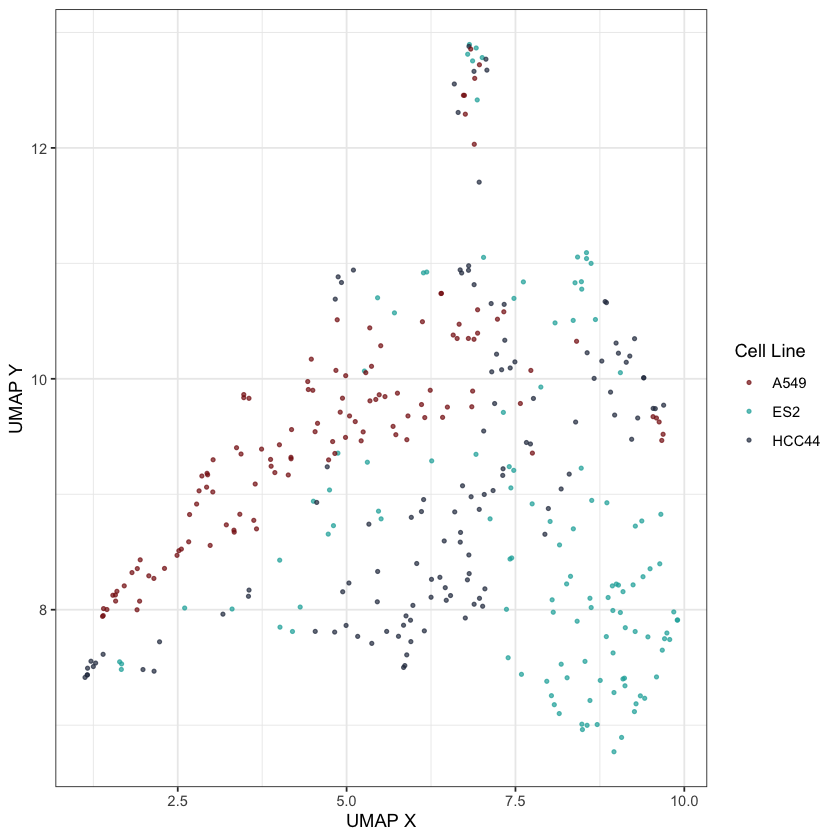

In [3]:
cell_line_gg <- ggplot(umap_df, aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = Metadata_cell_line), alpha = point_alpha, size = point_size) +
    xlab("UMAP X") +
    ylab("UMAP Y") +
    scale_color_manual(
        name = "Cell Line",
        values = cell_line_colors,
        labels = cell_line_labels
    ) +
    theme_bw()

cell_line_gg

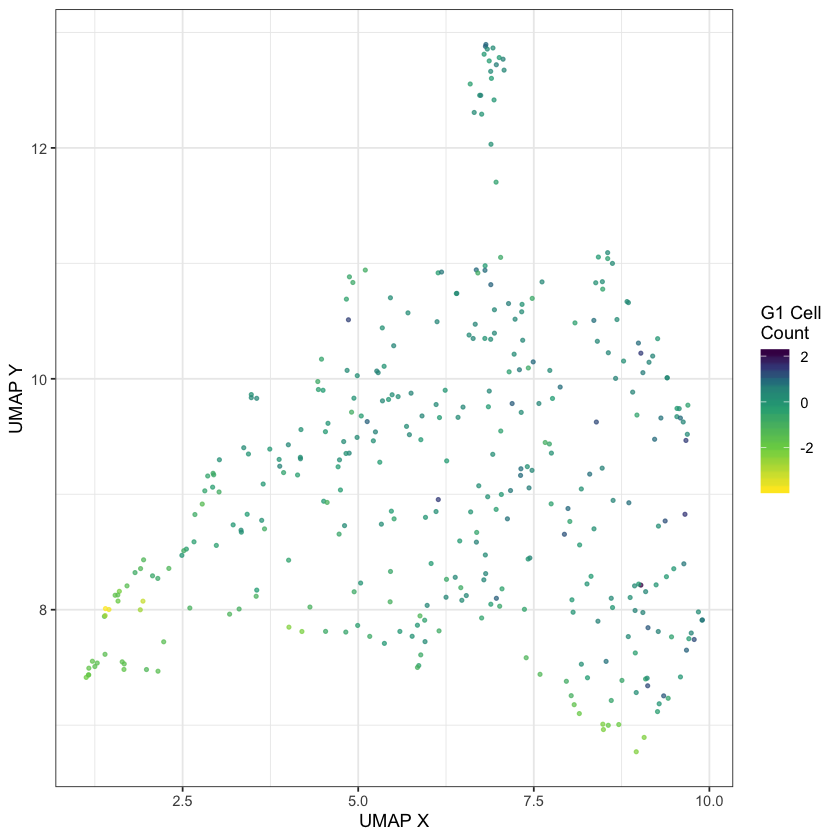

In [4]:
g1_count_gg <- ggplot(umap_df, aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = cc_g1_n_objects), alpha = point_alpha, size = point_size) +
    xlab("UMAP X") +
    ylab("UMAP Y") +
    theme_bw() +
    scale_color_viridis_c(
        name = "G1 Cell\nCount",
        values = scales::rescale(c(1, 0.8, 0.2))
    )

g1_count_gg

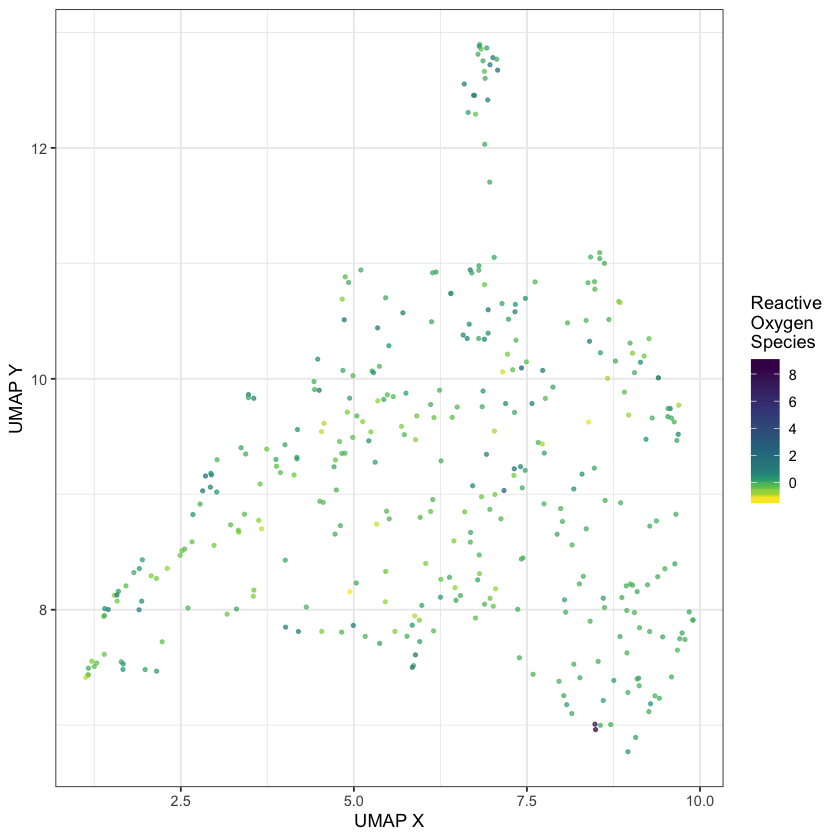

In [5]:
ros_gg <- ggplot(umap_df, aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = vb_ros_mean), alpha = point_alpha, size = point_size) +
    xlab("UMAP X") +
    ylab("UMAP Y") +
    theme_bw() +
    scale_color_viridis_c(
        name = "Reactive\nOxygen\nSpecies",
        values = scales::rescale(c(10, 3.5, 2))
    )

ros_gg

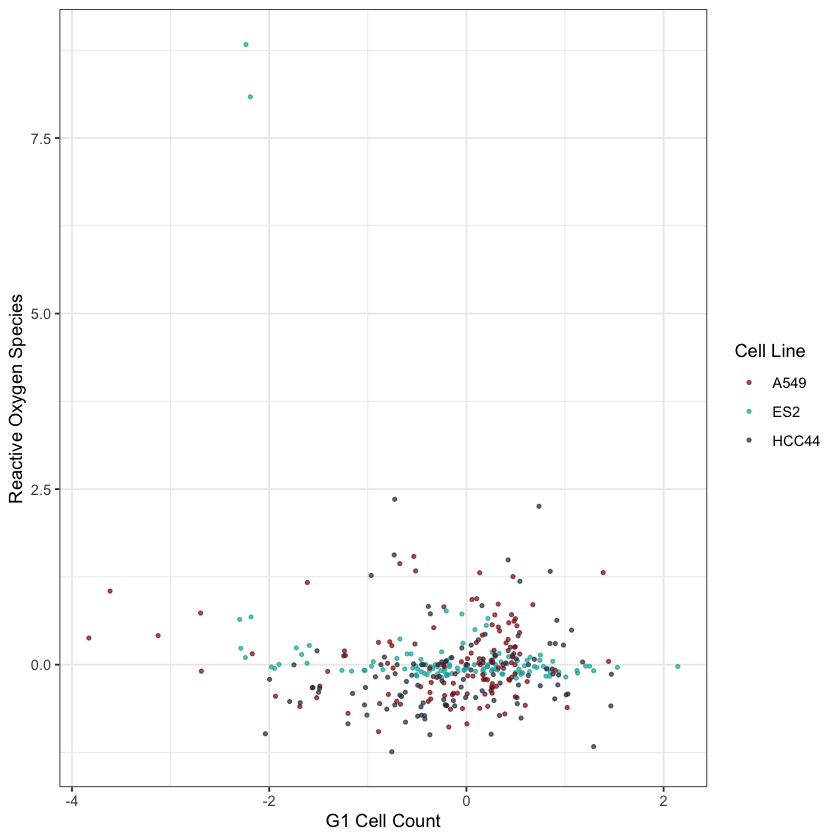

In [6]:
scatter_gg <- ggplot(umap_df, aes(x = cc_g1_n_objects, y = vb_ros_mean)) +
    geom_point(aes(color = Metadata_cell_line), alpha = point_alpha, size = point_size) +
    xlab("G1 Cell Count") +
    ylab("Reactive Oxygen Species") +
    theme_bw() +
    scale_color_manual(
        name = "Cell Line",
        values = cell_line_colors,
        labels = cell_line_labels
    )

scatter_gg

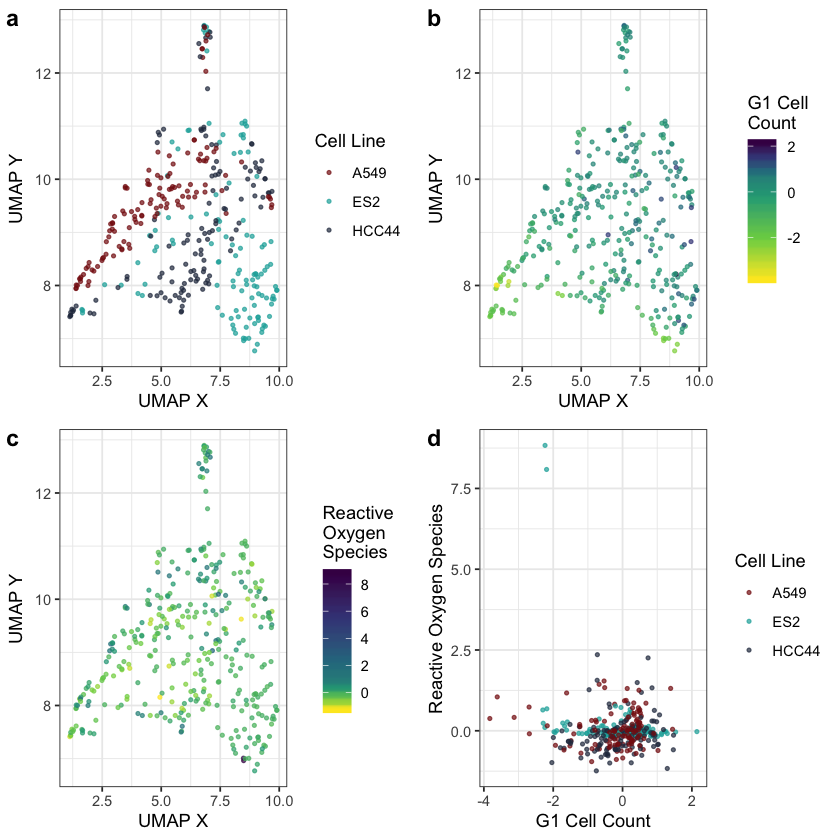

In [7]:
# Create multiplot
full_figure <- cowplot::plot_grid(
    cell_line_gg,
    g1_count_gg,
    ros_gg,
    scatter_gg,
    labels = c("a", "b", "c", "d"),
    align = "hv",
    nrow = 2
)

cowplot::save_plot(
    filename = output_figure_file,
    plot = full_figure,
    dpi = 500,
    base_width = 7,
    base_height = 5
)

full_figure